## Likelihood

# Intuition
A likelihood quantifies how well a statistical model explains observed data. In Bayesian terms, it is the key ingredient in updating prior beliefs to posterior beliefs.

**FIGURE PLACEHOLDER:** ![Likelihood Intuition Cartoon](image_placeholder)

# Definition

- The **"likelihood"** for a model is defined as the probability of the data under the model. That is, given data $D=(x_1, y_1)$ (let's start with a single sample), the likelihood for a fully-specified (discrete) model $M$ is defined as

$$
L(M)=p(D|M)
$$
where $p(⋅|M)$ denotes the probability mass function (for discrete data) or probability density function (for continuous data) for model $M$.

- When there are multiple samples in $D$, consisting of ($x_1, \dots, x_n$) and ($y_1, \dots, y_n$), the likelihood for the model $M$ is the joint probability of all these data points given the model. Assuming the samples are independent, the likelihood function is the product of the individual likelihoods for each sample:

$$
L(M) = p(D | M) = \prod_{i=1}^{n} p(x_i, y_i | M)
$$

This is because, under the assumption of independence, the joint probability of multiple independent samples is the product of their individual probabilities. 

# Example

## Single sample

We want to assess whether a genetic variant is associated with **height**. To do this, we compare two models:

1. **Model 1 ($M_1$)**: The genetic variant has **no effect** on height. This means the trait follows a normal distribution with a mean of 170 cm (average height), with a known standard deviation $\sigma$.

$$
y_i \sim \mathcal{N}(170, \sigma^2)
$$
  
2. **Model 2 ($M_2$)**: The genetic variant has a **significant effect** on height. In this model, the trait follows a normal distribution, but the mean height increases by 2cm for each minor allele (effect size $\theta = 1$). So, for an individual with genotype $x_i$ (coded as 0, 1, or 2 for the number of minor alleles), the mean height is $170 + 2x_i$ cm.

$$
y_i \sim \mathcal{N}(170 + 2x_i, \sigma^2)
$$

Here, $x_i$ represents the genotype of the individual for the genetic variant under study. If $x_i = 0$, the individual has no minor alleles; if $x_i = 1$, they are heterozygous; and if $x_i = 2$, they have two copies of the minor allele.

We aim to evaluate which model is more supported by the observed data (e.g., height measurements) using likelihood.


In [129]:
rm(list=ls())
set.seed(1)
# Simulate true mean and effect size
baseline <- 170  # Population mean of the trait (e.g., height in cm) when the genetic variant has no effect (Model 1)
theta_true <- 2  # True effect size of the genetic variant. This represents the change in height (in cm) associated with each additional minor allele (Model 2)
sd_y <- 1  # Standard deviation of the trait (e.g., variability in height measurement within the population)

# Simulate genotype and height values
genotype <- 1  # Example genotype (heterozygous)
n = length(genotype)
height_value <- rnorm(n, mean = baseline + theta_true * genotype, sd = sd_y)

data.frame(genotype = genotype, height = height_value)

genotype,height
<dbl>,<dbl>
1,171.3735


For **Model 1**, the likelihood for observing a height value $y_i$ is calculated under the assumption that height follows a normal distribution with mean 170 cm:

$$
L(M_1) = \frac{1}{\sqrt{2\pi s^2}} \exp \left( -\frac{(y_i - 170)^2}{2s^2} \right)
$$

For **Model 2**, the likelihood for observing a height value $y_i$ is calculated under the assumption that height follows a normal distribution with mean $170 + 2x_i$ (due to the genetic effect of 2 cm):

$$
L(M_2) = \frac{1}{\sqrt{2\pi s^2}} \exp \left( -\frac{(y_i - (170 + 2x_i))^2}{2s^2} \right)
$$

In [131]:
# Likelihood function for normal distribution
likelihood <- function(theta, sd, y) {
  prod(dnorm(y, mean = theta, sd = sd, log = FALSE))
}

The Likehood for $M_1$ is:

In [132]:
likelihood_1_single_sample <- likelihood(theta = baseline, sd = sd_y, height_value)
likelihood_1_single_sample

[1] 0.1553223

In [133]:
likelihood_2_single_sample <- likelihood(theta = baseline + theta_true * genotype, sd = sd_y, height_value)
likelihood_2_single_sample

[1] 0.3278626

To better understand the likelihoods, we can visualize the likelihood functions for both models. We plot the likelihood curves for both $M_1$ and $M_2$, with the observed height value marked on the plot. This allows us to visually compare the likelihoods of each model.


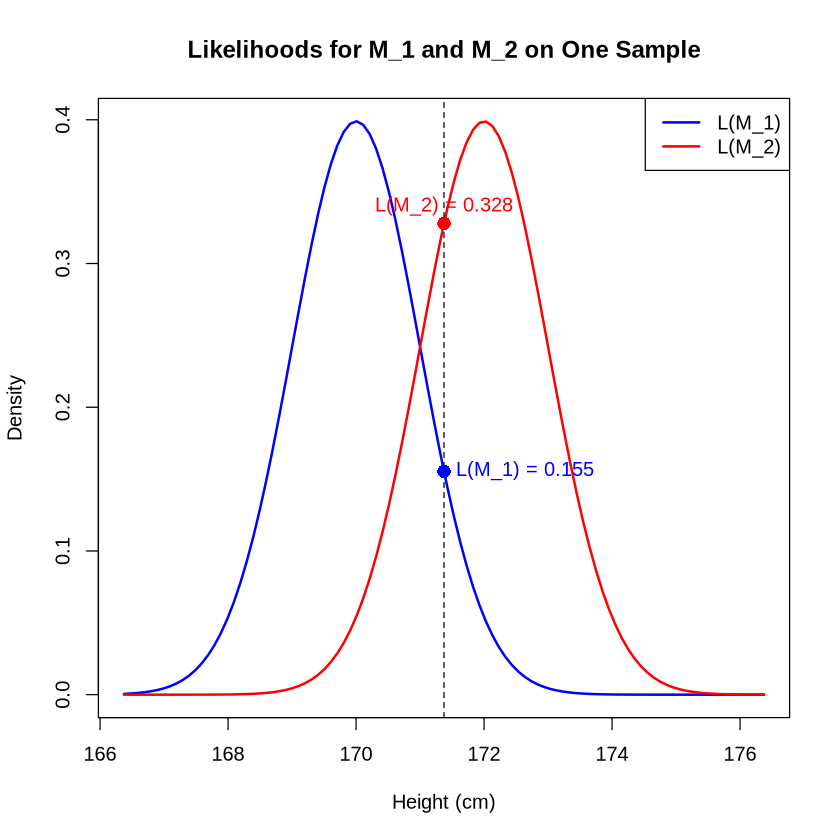

In [134]:
# Create a sequence of x values for plotting the density
x_vals <- seq(height_value - 5, height_value + 5, length.out = 100)

# Compute the likelihood densities for both models
likelihood_1_curve <- dnorm(x_vals, mean = baseline, sd = sd_y)
likelihood_2_curve <- dnorm(x_vals, mean = baseline + theta_true * genotype, sd = sd_y)

# Plot the two likelihood curves
plot(x_vals, likelihood_1_curve, type = "l", col = "blue", lwd = 2, 
     xlab = "Height (cm)", ylab = "Density", 
     main = "Likelihoods for M_1 and M_2 on One Sample")
lines(x_vals, likelihood_2_curve, col = "red", lwd = 2)

# Add vertical dashed line to show the observed height value
abline(v = height_value, col = "black", lty = 2)

# Add labels for the likelihood values at the height value for both models
y_label_1 <- dnorm(height_value, mean = baseline, sd = sd_y)
y_label_2 <- dnorm(height_value, mean = baseline + theta_true, sd = sd_y)

text(height_value, y_label_1, labels = paste("L(M_1) =", round(y_label_1, 3)), pos = 4, col = "blue")
text(height_value, y_label_2, labels = paste("L(M_2) =", round(y_label_2, 3)), pos = 3, col = "red")

# Add points at the intersection of the height value on both curves
points(height_value, y_label_1, col = "blue", pch = 16, cex = 1.5)
points(height_value, y_label_2, col = "red", pch = 16, cex = 1.5)

# Add a legend
legend("topright", legend = c("L(M_1)", "L(M_2)"), 
       col = c("blue", "red"), lwd = 2)


**Interpretation of the figure:**

- The plot shows the likelihoods of the two models for the observed height value.
- The blue curve ($M_1$) shows the likelihood of the height value under the assumption that the genetic variant has no effect on height (mean = 170 cm).
- The red curve ($M_2$) shows the likelihood assuming a genetic effect on height (mean = 172 cm due to the genetic effect).

By comparing the likelihoods at the observed height value (the vertical dashed line), we can see which model is more likely given the observed data. A higher likelihood indicates a better fit of the model to the data. If $M_2$ has a higher likelihood, it suggests that the genetic variant has an effect on height. If $M_1$ has a higher likelihood, it suggests that there is no evidence for a genetic effect.


## Multiple samples

Following the one-sample case, let's consider three samples.

Therefore, if $y_i$ ($i=1,...,n$) is the observed trait value for individual $i$, then under **$M_1$**:

$$
y_i \sim \mathcal{N}(170, s^2)
$$
  
versus under **$M_2$**:
$$
y_i \sim \mathcal{N}(170 + 2x_i, s^2)
$$


**The likelihood for each model is the probability of observing the data given the parameters of the model.**

For a normal distribution, the likelihood for $M_1$ is given by:

$$
L(M_1) = \prod_{i=1}^{n} \frac{1}{\sqrt{2\pi s^2}} \exp \left( -\frac{(y_i - 170)^2}{2 s^2} \right)
$$

For **Model 2 ($M_2$)**, the likelihood becomes:

$$
L(M_2) = \prod_{i=1}^{n} \frac{1}{\sqrt{2\pi s^2}} \exp \left( -\frac{(y_i - (170 + 2x_i))^2}{2 s^2} \right)
$$

This product represents the likelihood of observing the entire dataset under each model, considering each individual’s trait value and genotype.

Here let's consider when $n=3$.

In [135]:
set.seed(2)
# Simulate genotypes for three individuals
genotype <- c(1, 2, 0)

# Simulate height values for three individuals based on genotypes
n = length(genotype)
height_values <- rnorm(n, mean = baseline + theta_true * genotype, sd = sd_y)

data.frame(genotype = genotype, height = height_values)

genotype,height
<dbl>,<dbl>
1,171.1031
2,174.1848
0,171.5878


In [137]:
# Likelihood for Model 1
likelihood_1_multi_samples <- likelihood(theta = baseline, sd = sd_y, height_values)
likelihood_1_multi_samples

[1] 1.542167e-06

In [138]:
# Likelihood for Model 2
likelihood_2_multi_samples <- likelihood(theta = baseline + theta_true * genotype, sd = sd_y, height_values)
likelihood_2_multi_samples

[1] 0.01183428

The likelihoods for $M_1$ and $M_2$ are vastly different, with $M_2$ yielding a much higher likelihood compared to Model 1. This suggests that the genetic effect in $M_2$ fits the observed height data better. 

**In topic 6.2 we will discuss how to compare the likelihood of two (or more) models.**

## Log-likelihood

The log-likelihood is the **logarithm of the likelihood function**. In practice, the **log-likehood** is often preferred over the likelihood when there are multiple samples, for several reasons:

1. **Numerical Stability**:  
   Likelihood values are often very small, especially in large datasets. Directly working with such small numbers can cause numerical underflow. Taking the logarithm transforms these small numbers into more manageable values.

2. **Simplifies Computation**:  
   Many likelihood functions involve products of probabilities. The logarithm converts these products into sums, making them easier to compute and differentiate:

   $$
   l(\theta) = \log P(X_1, X_2, ..., X_n | \theta) = \sum_{i=1}^{n} \log P(X_i | \theta)
   $$

   This is particularly useful in optimization and estimation procedures.

3. **Convexity and Optimization**:  
   In many cases, the log-likelihood function is concave (or at least easier to optimize) compared to the likelihood function. This makes methods like gradient ascent and Newton-Raphson more effective.

4. **Consistency with Information-Theoretic Measures**:  
   Many statistical criteria, such as the Akaike Information Criterion (AIC) and Bayesian Information Criterion (BIC), are based on log-likelihood. This aligns statistical inference with concepts from information theory.

5. **Asymptotic Properties**:  
   In large-sample theory (e.g., asymptotics of Maximum Likelihood Estimation), the log-likelihood has well-defined properties, such as its relationship to the Fisher Information and the Central Limit Theorem.

Overall, the log-likelihood improves numerical precision, simplifies mathematical operations, and aligns with theoretical properties that are useful for statistical inference.

In this case, the log-likelihood for a normal distribution is given by:

$$
\ell(\theta, s) = -\frac{n}{2} \log(2\pi s^2) - \sum_{i=1}^{n} \frac{(y_i - \theta)^2}{2 s^2}
$$


In [139]:
# Log-likelihood for a model with theta and s
log_likelihood <- function(theta, sd, y) {
  sum(dnorm(y, mean = theta, sd = sd, log = TRUE))
}


The log-likehood for $M_1$ is:

In [140]:
loglikelihood_1_multi_samples <- log_likelihood(theta = baseline, sd = sd_y, height_values)
loglikelihood_1_multi_samples

[1] -13.38232

The log-likehood for $M_2$ is:

In [141]:
loglikelihood_2_multi_samples <- log_likelihood(theta = baseline + theta_true * genotype, sd = sd_y, height_values)
loglikelihood_2_multi_samples

[1] -4.436754

If we calculate the likelihood first and then take the log of it, they are the same:

In [142]:
log(likelihood_1_multi_samples)
log(likelihood_2_multi_samples)

[1] -13.38232

[1] -4.436754

# Summary
- The **"likelihood"** for a model is defined as the probability of the data under the model. That is, given data $D$, the likelihood for a fully-specified (discrete) model $M$ is defined as

$$
L(M)=p(D|M)
$$
where $p(⋅|M)$ denotes the probability mass function (for discrete data) or probability density function (for continuous data) for model $M$.

- When expanding from a **single sample** to **multiple samples**, the likelihood of the entire dataset is calculated as the **product of individual likelihoods** for each sample. This allows us to evaluate how well the model fits all observations collectively, as shown in the multiple-sample case.

- In practice, **log-likelihood** is often preferred over **likelihood** because it offers better numerical precision, simplifies mathematical operations, and aligns with properties useful for statistical inference. The log transformation also makes likelihoods easier to handle, particularly when comparing multiple models:

$$
l(M)=\log(L(M)) = \log(p(D|M))
$$

- Although here we introduce likelihood for a model, in practice it is almost always the **likelihood ratio** (or **log-likelihood ratio**)  that matters (which we will introduce in the next notebook). As Matthew stated in the notes: 
> This is because actual likelihood values are generally not useful - it is only the ratios that matter when comparing the models. One way of thinking about this is that the actual likelihood values are very context dependent, and so likelihoods from different data sets are not comparable with one another.


# Supplementary Materials

Here we provide more examples to help you understand the likelihood.

## Example 1 -- allele frequency of elephant

### Description of the question

Here we use an example from [Matthew Stephen's notes](http://stephens999.github.io/fiveMinuteStats/likelihood_ratio_simple_models.html).

> [Technical Note: to simplify this problem I have assumed that elephants are haploid, which they are not. If you do not know what this means you should simply ignore this comment.]
>
> There are two subspecies of African Elephant: savannah and forest elephants, which differ in their genetic makeup. Interpol have seized an illegally-smuggled elephant tusk, and they want to know which subspecies of elephant the tusk came from. To try to answer this they collect DNA from the tusk and measure it at a number of locations (“markers” in genetics jargon) along the elephant genome. At each marker the DNA can be one of two types (“alleles” in genetics jargon), which for simplicity we will label 0 and 1. So the available data on the tusk might look something like this.
> 
> |Marker|Allele|
|:--:|:--:|
|1|	1|
|2|0|
|3|1|
|4|0|
|5|0|
|6|1|

In [ ]:
x = c(1,0,1,0,0,1)

> Interpol also have information on the frequency of each allele in each of the two subspecies - this was obtained by measuring the DNA of a large number of savanna elephants and a large number of forest elephants. We will use $f_{S{j}}$ and $f_{F{j}}$ to denote the frequency of “1” allele at marker j in savanna and forest elephants respectively (and since there are only two alleles, the frequency of the 0 allele is $1−f_{S{j}}$ and $1−f_{F{j}}$). Here is a table of this information.
>
> | marker | $f_S$  | $f_F$  |
|:--------:|:-----:|:-----:|
| 1      | 0.40 | 0.80 |
| 2      | 0.12 | 0.20 |
| 3      | 0.21 | 0.11 |
| 4      | 0.12 | 0.17 |
| 5      | 0.02 | 0.23 |
| 6      | 0.32 | 0.25 |


In [ ]:
fS = c(0.40, 0.12,0.21,0.12,0.02,0.32)
fF = c(0.8,0.2,0.11,0.17,0.23,0.25)

> The question before us is: **Which subspecies of elephant did the tusk come from, and how confident should we be in this conclusion?**

### Solution

> We can phrase this problem as a “model comparison” problem. We have data $X=x$ from our tusk, and we have two different models for how those data might have arisen: it could have been sampled from a savanna elephant, or it could have been sampled from a forest elephant. We will use $M_S$ and $M_F$ as shorthand for these two models. A key point is that these two models imply different probability distributions for $X$: some values of $X$ are more common under $M_S$ and others are more common under $M_F$.
>
> Denoting the probability mass functions of these two distributions p(⋅|MS) and p(⋅|MF), and assuming the data at different markers are independent, these probability distributions are:
> $$
p(x|M_S)=\prod_j f_{S_j}^{x_j}(1−f_{S_j})^{1−x_j}
$$
>
> and
> $$
p(x|M_F)=\prod_j f_{F_j}^{x_j}(1−f_{F_j})^{1−x_j}
$$
>>
>
> where the values of $f_S$ and $f_F$ are given in the table above.
>
> The key idea to introduce here is that a useful summary of how strongly the data $x$ support one model vs another model is given by the “likelihood ratio” (LR).

**So before we drive ourselves into the likelihood ratio of two methods, in this notebook, let's focus on the likelihood:**

The **"likelihood"** for a model is defined as the probability of the data under the model. That is, given data $x$, the likelihood for a fully-specified (discrete) model M is defined as

$$
L(M_S)=p(x|M_S)=\prod_j f_{S_j}^{x_j}(1−f_{S_j})^{1−x_j} \\
L(M_F)=p(x|M_F)=\prod_j f_{F_j}^{x_j}(1−f_{F_j})^{1−x_j}
$$
where $p(⋅|M)$ denotes the probability mass function for model $M$.

In [ ]:
L = function(f,x){ prod(f^x*(1-f)^(1-x)) }

In [ ]:
L(fS,x)

In [ ]:
L(fF,x)

## Example 2 -- concentration of protein in the blood 

### Description

> A medical screening test for a disease involves measuring the concentration ($X$) of a protein in the blood. In normal individuals $X$ has a Gamma distribution with mean 1 and shape 2. In diseased individuals the protein becomes elevated, and $X$ has a Gamma distribution with mean 2 and shape 2. Plotting the probability density functions of these distributions yields:
> 

Suppose that for a particular individual we observe $X=4.02$. Then the question is

**Is this individual from the normal group or the diseased group?**

### Solution

The likelihood for the two models -- normal individual group ($M_0$) or diseased individual group ($M_1$) --- can therefore be calculated as:


$$
L(M_0)=p(x|M_0)= \frac{\beta_0^{\alpha_0} x^{\alpha_0 - 1} e^{-\beta_0 x}}{\Gamma(\alpha_0)} = \frac{2^2 \cdot 4.02^{2 - 1} e^{-2 \cdot 4.02}}{\Gamma(2)}\\
L(M_1)=p(x|M_1)= \frac{\beta_1^{\alpha_1} x^{\alpha_1 - 1} e^{-\beta_1 x}}{\Gamma(\alpha_1)} = \frac{1^2 \cdot 4.02^{2 - 1} e^{-1 \cdot 4.02}}{\Gamma(2)}
$$


The difference here is that instead of the **probability mass functions** that we used in the first example, here we use the **probability density functions (PDF)** of Gamma distribution:

$$
f(x; \alpha, \beta) = \frac{\beta^\alpha x^{\alpha - 1} e^{-\beta x}}{\Gamma(\alpha)}, \quad x > 0
$$


where:
- $\alpha$ is the shape parameter,
- $\beta$ is the rate parameter ($\beta = \frac{1}{\theta}$, where $\theta$ is the scale parameter),
- $\Gamma(\alpha)$ is the Gamma function.

In [ ]:
X_val=4.02

In R we can use the [dgamma](https://stat.ethz.ch/R-manual/R-devel/library/stats/html/GammaDist.html) function to calculate the PDF of gamma function at data $x$.

In [ ]:
# dgamma(x, shape, rate = 1, scale = 1/rate, log = FALSE) returns the Density for the Gamma distribution with parameters shape and scale at x
y0_val = dgamma(X_val,scale=0.5,shape=2)
y1_val = dgamma(X_val,scale=1,shape=2)

This can be visualized from the figure below. 

In [ ]:
x <- seq(0, 10, length = 100)

# Compute density values
y0 <- dgamma(x, scale = 0.5, shape = 2)
y1 <- dgamma(x, scale = 1, shape = 2)

# Plot the first Gamma density
plot(x, y0, type = "l", xlab = "Protein Concentration", ylab = "Density",
     col = "black", lwd = 2, ylim = c(0, max(y0, y1)))

# Add the second Gamma density
lines(x, y1, col = "red", lwd = 2)

# Add a vertical line at x = 4.02
abline(v = X_val, lty = 2, col = "blue")

# Mark the corresponding points
points(X_val, y0_val, col = "black", pch = 19, cex = 1.2) # normal group
points(X_val, y1_val, col = "red", pch = 19, cex = 1.2) # diseased group

# Add text labels near the points
text(X_val, y0_val, labels = round(y0_val, 4), pos = 3, col = "black")
text(X_val, y1_val, labels = round(y1_val, 4), pos = 3, col = "red")

# Add legend
legend("topright", legend = c("Gamma(0.5, 2)", "Gamma(1, 2)"), 
       col = c("black", "red"), lwd = 2, bty = "n")


# Recommended Reading

- Statistical Rethinking, 2nd Edition, Section 2.1, 2.3, 2.4.
- Section *Likelihood Ratio and Likehood* in [FiveMinuteStats](http://stephens999.github.io/fiveMinuteStats/index.html) by Matthew Stephens
